<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%976_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

Завдання 1

Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

f(x) =
                                                                 2             ↪
                     -42.0138888888889⋅(0.0909090909090909⋅x - 1)              ↪
3.33333333333333⋅√2⋅ℯ                                                2.9166666 ↪
────────────────────────────────────────────────────────────────── + ───────── ↪
                                √π                                             ↪

↪                                                 2
↪             -19.53125⋅(0.0666666666666667⋅x - 1) 
↪ 6666667⋅√2⋅ℯ                                     
↪ ─────────────────────────────────────────────────
↪                    √π                            

Indefinite integral  F(x) = ∫ f(x) dx =
√2⋅(4.94974746830583⋅erf(0.294627825494395⋅x - 4.41941738241592) + 2.828427124 ↪

↪ 74619⋅erf(0.58925565098879⋅x - 6.48181216087669))

Definite integral ∫_9^18 f(x) dx (exact):
14.178654163478⋅√2

Definite integral (numeric): 20.05164501
Average over [9,18]: 2.227960557


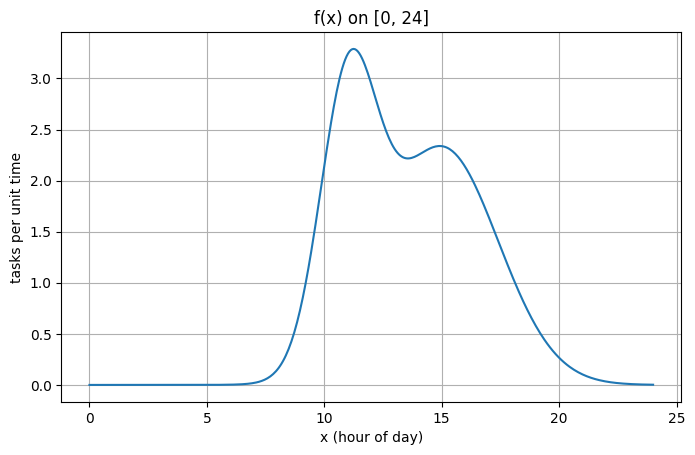

In [ ]:
# --- Imports
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- Symbols & constants
x = sp.symbols('x', real=True)
pi = sp.pi

mu1, sigma1, w1 = sp.Integer(11), sp.Float(1.2), sp.Integer(4)
mu2, sigma2, w2 = sp.Integer(15), sp.Float(2.4), sp.Integer(7)
a, b = sp.Integer(9), sp.Integer(18)

# --- Function (дві гаусіани з вагами, помножені на 2)
f = 2 * (
    w1 / (sigma1 * sp.sqrt(2*pi)) * sp.exp(-sp.Rational(1,2) * ((x-mu1)/sigma1)**2) +
    w2 / (sigma2 * sp.sqrt(2*pi)) * sp.exp(-sp.Rational(1,2) * ((x-mu2)/sigma2)**2)
)

# --- Indefinite integral (SymPy)
F = sp.integrate(f, x)             # символічно
F_simpl = sp.simplify(F)

# --- Definite integral on [a,b]
I_ab_exact = sp.integrate(f, (x, a, b))
I_ab_num = sp.N(I_ab_exact, 10)
avg_ab = I_ab_num / (b - a)

# --- Print results
print("f(x) =")
sp.pprint(f)
print("\nIndefinite integral  F(x) = ∫ f(x) dx =")
sp.pprint(F_simpl)
print("\nDefinite integral ∫_{}^{} f(x) dx (exact):".format(a, b))
sp.pprint(I_ab_exact)
print("\nDefinite integral (numeric):", I_ab_num)
print("Average over [9,18]:", avg_ab)

# --- Plot on [0,24]
xs = np.linspace(0, 24, 400)
f_np = sp.lambdify(x, f, "numpy")
ys = f_np(xs)

plt.figure(figsize=(8,4.8))
plt.plot(xs, ys)
plt.title("f(x) on [0, 24]")
plt.xlabel("x (hour of day)")
plt.ylabel("tasks per unit time")
plt.grid(True)
plt.show()


Завдання 2

Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

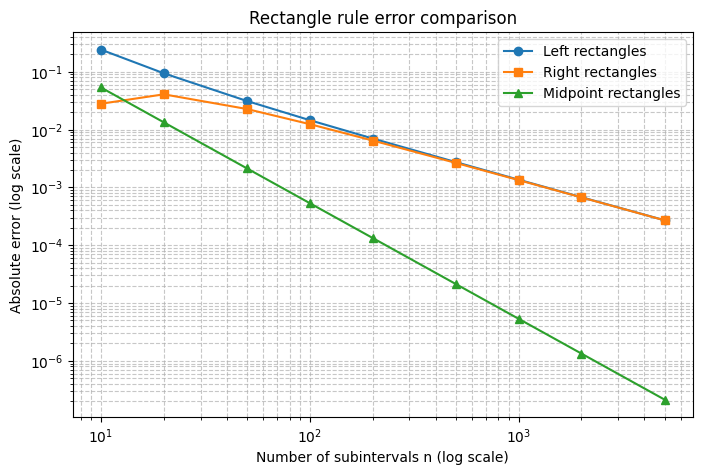

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Символьне визначення функції (завдання 1)
x = sp.symbols('x', real=True)
mu1, sigma1, w1 = 11, sp.Float(1.2), sp.Integer(4)
mu2, sigma2, w2 = 15, sp.Float(2.4), sp.Integer(7)

f_sym = 2 * (
    w1 / (sigma1 * sp.sqrt(2*sp.pi)) * sp.exp(-sp.Rational(1,2) * ((x - mu1)/sigma1)**2) +
    w2 / (sigma2 * sp.sqrt(2*sp.pi)) * sp.exp(-sp.Rational(1,2) * ((x - mu2)/sigma2)**2)
)

# Перетворюємо на Python-функцію
f = sp.lambdify(x, f_sym, "numpy")

# --- 2. Метод прямокутників
def rectangle_rule(func, a, b, n, variant="midpoint"):
    """
    Чисельне інтегрування методом прямокутників.
    variant: 'left', 'right', або 'midpoint'
    """
    a = float(a); b = float(b)
    n = int(n)
    h = (b - a) / n
    if variant == "left":
        xs = a + h * np.arange(0, n)
    elif variant == "right":
        xs = a + h * np.arange(1, n+1)
    elif variant == "midpoint":
        xs = a + h * (np.arange(0, n) + 0.5)
    else:
        raise ValueError("variant must be 'left', 'right', or 'midpoint'")
    return h * np.sum(func(xs))

# --- 3. Параметри інтегрування
a, b = 9.0, 18.0

# --- 4. Еталонне значення з SymPy (висока точність)
I_exact = float(sp.N(sp.integrate(f_sym, (x, a, b)), 15))

# --- 5. Масиви для зберігання похибок
ns = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
errors_left = []
errors_right = []
errors_mid = []

for n in ns:
    I_left = rectangle_rule(f, a, b, n, "left")
    I_right = rectangle_rule(f, a, b, n, "right")
    I_mid = rectangle_rule(f, a, b, n, "midpoint")
    errors_left.append(abs(I_left - I_exact))
    errors_right.append(abs(I_right - I_exact))
    errors_mid.append(abs(I_mid - I_exact))

# --- 6. Графік похибок
plt.figure(figsize=(8,5))
plt.loglog(ns, errors_left, 'o-', label='Left rectangles')
plt.loglog(ns, errors_right, 's-', label='Right rectangles')
plt.loglog(ns, errors_mid, '^-', label='Midpoint rectangles')
plt.xlabel("Number of subintervals n (log scale)")
plt.ylabel("Absolute error (log scale)")
plt.title("Rectangle rule error comparison")
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend()
plt.show()


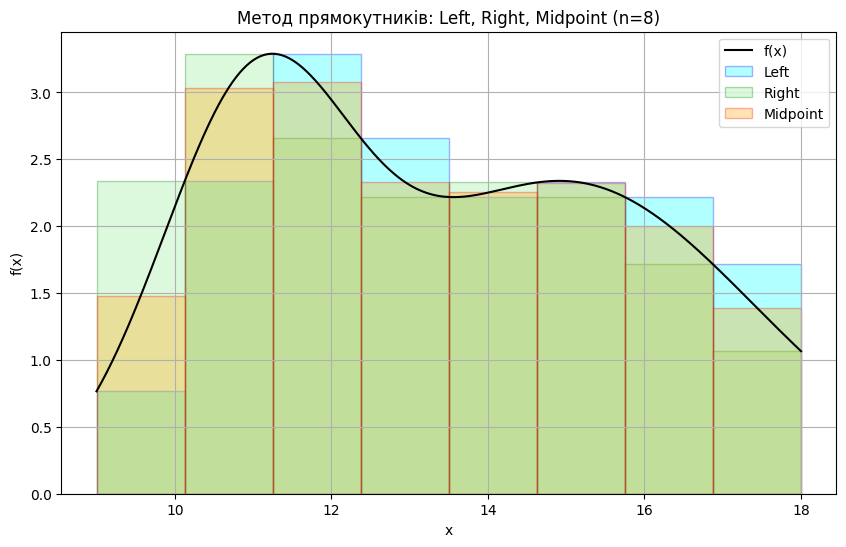

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Функція з завдання 1
x = sp.symbols('x', real=True)
mu1, sigma1, w1 = 11, sp.Float(1.2), sp.Integer(4)
mu2, sigma2, w2 = 15, sp.Float(2.4), sp.Integer(7)

f_sym = 2 * (
    w1 / (sigma1 * sp.sqrt(2*sp.pi)) * sp.exp(-sp.Rational(1,2) * ((x - mu1)/sigma1)**2) +
    w2 / (sigma2 * sp.sqrt(2*sp.pi)) * sp.exp(-sp.Rational(1,2) * ((x - mu2)/sigma2)**2)
)
f = sp.lambdify(x, f_sym, "numpy")

# --- 2. Параметри інтегрування
a, b = 9.0, 18.0
n = 8  # невелика кількість кроків для наочності
h = (b - a) / n

# --- 3. Точки для трьох варіантів
xs_left = a + h * np.arange(0, n)
ys_left = f(xs_left)

xs_right = a + h * np.arange(1, n+1)
ys_right = f(xs_right)

xs_mid = a + h * (np.arange(0, n) + 0.5)
ys_mid = f(xs_mid)

# --- 4. Побудова графіка функції
X_plot = np.linspace(a, b, 400)
Y_plot = f(X_plot)

plt.figure(figsize=(10,6))
plt.plot(X_plot, Y_plot, 'k-', label='f(x)')

# --- Прямокутники Left
for xi, yi in zip(xs_left, ys_left):
    plt.bar(xi, yi, width=h, align='edge', alpha=0.3,
            edgecolor='blue', facecolor='cyan',
            label='Left' if xi == xs_left[0] else "")

# --- Прямокутники Right
for xi, yi in zip(xs_right, ys_right):
    plt.bar(xi-h, yi, width=h, align='edge', alpha=0.3,
            edgecolor='green', facecolor='lightgreen',
            label='Right' if xi == xs_right[0] else "")

# --- Прямокутники Midpoint
for xi, yi in zip(xs_mid, ys_mid):
    plt.bar(xi - h/2, yi, width=h, align='edge', alpha=0.3,
            edgecolor='red', facecolor='orange',
            label='Midpoint' if xi == xs_mid[0] else "")

# --- Оформлення
plt.title(f"Метод прямокутників: Left, Right, Midpoint (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


Завдання 3

Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

Метод трапецій: 20.0516343322
Точне значення : 20.0516450142
Похибка        : 1.07e-05


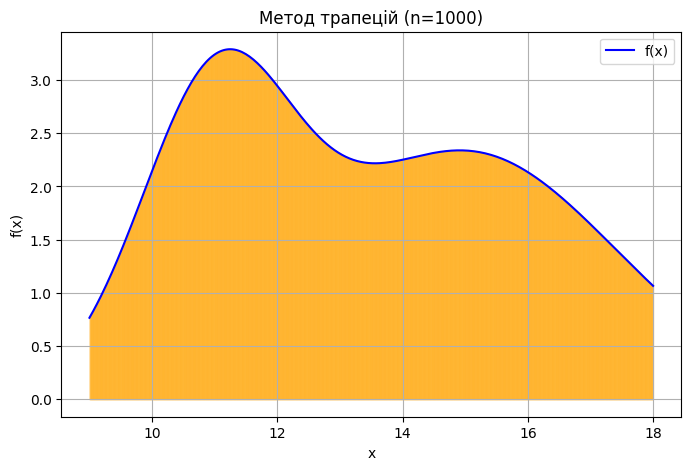

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- Функція з завдання 1
x = sp.symbols('x', real=True)
mu1, sigma1, w1 = 11, sp.Float(1.2), sp.Integer(4)
mu2, sigma2, w2 = 15, sp.Float(2.4), sp.Integer(7)

f_sym = 2 * (
    w1 / (sigma1 * sp.sqrt(2*sp.pi)) * sp.exp(-sp.Rational(1,2) * ((x - mu1)/sigma1)**2) +
    w2 / (sigma2 * sp.sqrt(2*sp.pi)) * sp.exp(-sp.Rational(1,2) * ((x - mu2)/sigma2)**2)
)
f = sp.lambdify(x, f_sym, "numpy")

# --- Метод трапецій
def trapezoid_rule(func, a, b, n):
    a, b = float(a), float(b)
    h = (b - a) / n
    xs = np.linspace(a, b, n+1)
    ys = func(xs)
    return h * (0.5*ys[0] + np.sum(ys[1:-1]) + 0.5*ys[-1])

# --- Параметри
a, b, n = 9.0, 18.0, 1000

# --- Обчислення
I_trap = trapezoid_rule(f, a, b, n)
I_exact = float(sp.N(sp.integrate(f_sym, (x, a, b)), 15))
print(f"Метод трапецій: {I_trap:.10f}")
print(f"Точне значення : {I_exact:.10f}")
print(f"Похибка        : {abs(I_trap - I_exact):.2e}")

# --- Графік
X_plot = np.linspace(a, b, 300)
Y_plot = f(X_plot)
xs = np.linspace(a, b, n+1)
ys = f(xs)

plt.figure(figsize=(8,5))
plt.plot(X_plot, Y_plot, 'b-', label='f(x)')
for i in range(n):
    plt.fill_between([xs[i], xs[i+1]], [ys[i], ys[i+1]], color='orange', alpha=0.3)
plt.title(f"Метод трапецій (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()
